In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from numpy import linalg as LA

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from lib.RadialBasisFunction import RBF
from lib.utils import get_v_from_data,mse

from sklearn.metrics import mean_squared_error

%matplotlib inline
plt.rcParams['figure.dpi'] = 100
plt.rcParams["figure.figsize"] = (8,8)

## Load the data

In [2]:
data = np.genfromtxt("data\\nonlinear_vectorfield_data_x0.txt", dtype='double')
print("Shape =", data.shape)
initial_data = data
data = np.genfromtxt("data\\nonlinear_vectorfield_data_x1.txt", dtype='double')
print("Shape =", data.shape)
transformed_data = data

Shape = (2000, 2)
Shape = (2000, 2)


## Visualize the data

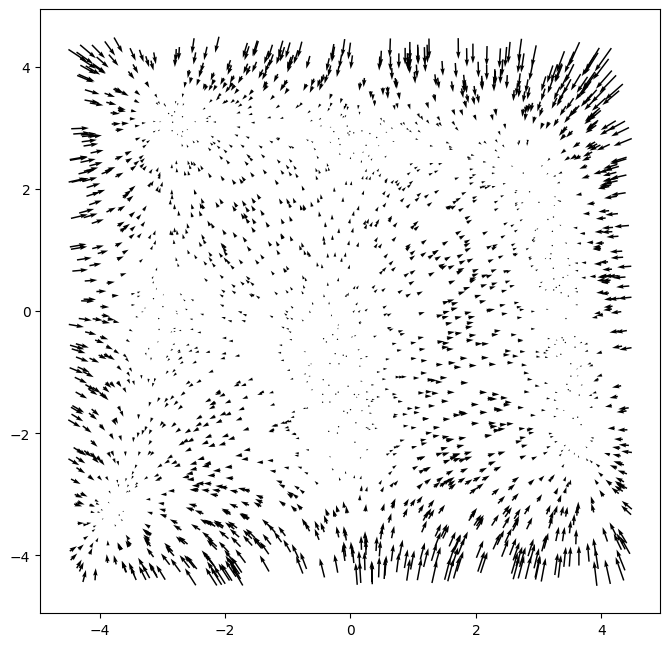

In [4]:
fig = plt.figure()
ax = plt.axes()

X,Y = zip(*initial_data)
X_new,Y_new = zip(*transformed_data)

delta_t = 0.01
v = get_v_from_data(initial_data,transformed_data,delta_t)
V_X,V_Y = zip(*v)


color = np.arange(len(X))
ax.quiver(X,Y,V_X,V_Y)
#ax.scatter(X,Y)
#ax.scatter(X_new,Y_new,c = 'green')

## Part One: Linear approximation

In [6]:
N = initial_data.shape[0]
F = get_v_from_data(initial_data,transformed_data,delta_t)
A,residuals,rank,s = LA.lstsq(initial_data,transformed_data,1000)
print(A)
X_new = np.zeros(initial_data.shape)
for i in range(N):
    X_new[i] = (A@initial_data[i])
print(X_new.shape)

[[ 9.89983988e-01  8.67271579e-04]
 [-2.53494232e-04  9.56732862e-01]]
(2000, 2)


## Visualize linear approximation

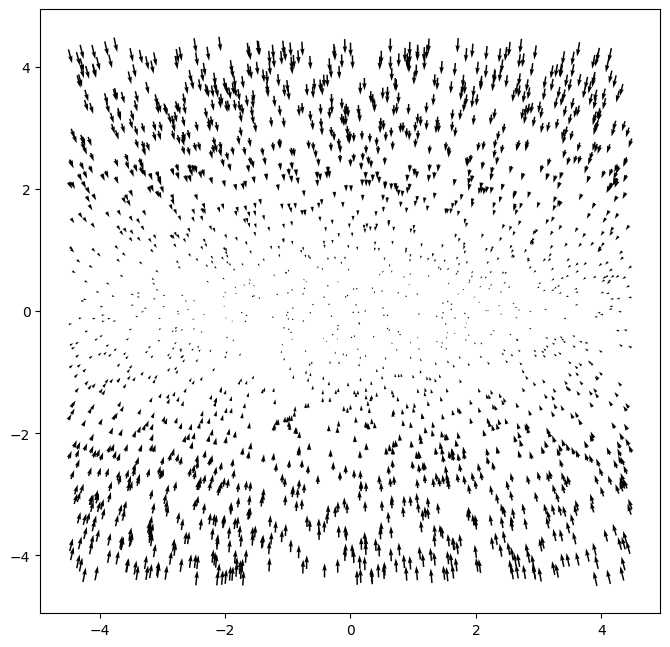

In [8]:
fig = plt.figure()
ax = plt.axes()

X,Y = zip(*initial_data)

v = get_v_from_data(initial_data,X_new,delta_t)
V_X,V_Y = zip(*v)


color = np.arange(len(X))
ax.quiver(X,Y,V_X,V_Y)

## Calculate MSE for linear approximation

In [9]:
ms = mse(transformed_data,X_new)
print(ms)

0.03728697125740115


## Part Two: Non-linear approximation with Radial Basis Functions

## With 100 Points

In [11]:
delta_time = 0.1
rbf = RBF(initial_data,transformed_data,100,1,delta_time)
predicted = np.zeros(initial_data.shape)
velocity = np.zeros(initial_data.shape)
velocity = rbf.rbf(initial_data)
predicted = initial_data + velocity*delta_time

## Visualize the predicted velocities

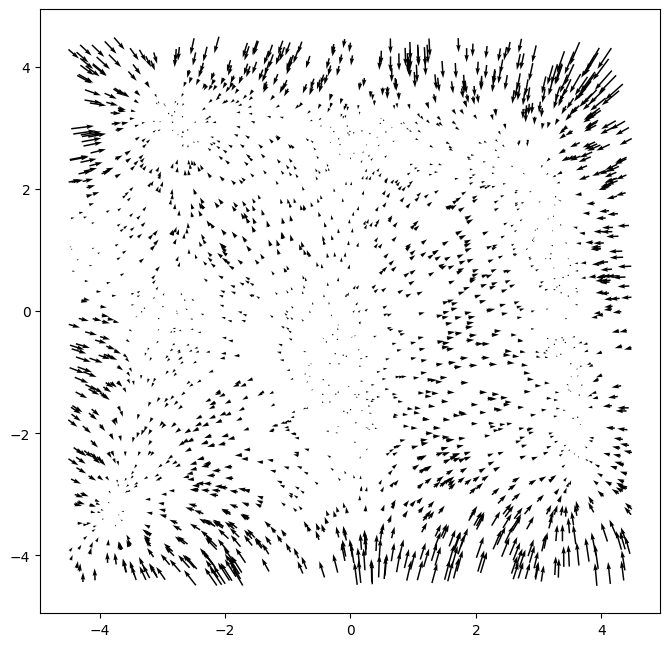

In [12]:
fig = plt.figure()
ax = plt.axes()

X,Y = zip(*initial_data)
V_X,V_Y = zip(*velocity)
ax.quiver(X,Y,V_X,V_Y)

## Calculate the MSE

In [13]:
ms = mse(transformed_data,predicted)
print("Mean square error: " , ms)

Mean square error:  0.002177466897525044


## With 1000 Points

In [14]:
delta_time = 0.1
rbf = RBF(initial_data,transformed_data,1000,1,delta_time)
velocity = rbf.rbf(initial_data)
predicted = initial_data + velocity*delta_time

## Visualize the prediced velocities

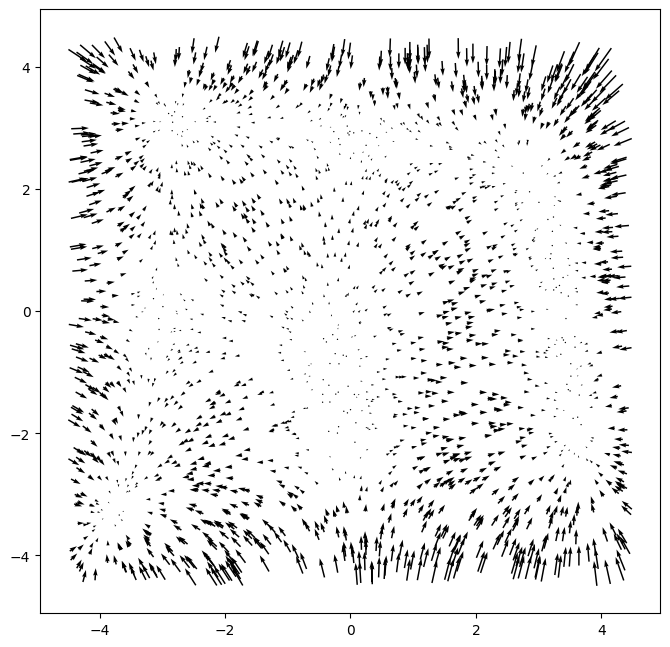

In [15]:
fig = plt.figure()
ax = plt.axes()

X,Y = zip(*initial_data)
V_X,V_Y = zip(*velocity)
ax.quiver(X,Y,V_X,V_Y)


## Calculate the MSE

In [16]:
ms = mse(transformed_data,predicted)
print("Mean square error: " , ms)

Mean square error:  7.713094572184452e-11


## Part three

In [17]:
delta_t = 0.01
total_time = 4
total_steps = total_time / delta_t
print(total_steps)
amount_of_points = 90

x = np.linspace(-4.5,4.5,amount_of_points)
y = np.linspace(-4.5,4.5,amount_of_points)
X,Y = np.meshgrid(x,y)
current_position = np.zeros([amount_of_points*amount_of_points,2])
for i in range(amount_of_points):
    for j in range(amount_of_points):
        current_position[j*amount_of_points+i][0] = X[i][j]
        current_position[j*amount_of_points+i][1] = Y[i][j]
rbf = RBF(initial_data,transformed_data,1000,1,delta_time)
for i in range(int(total_steps)):
    velocity = rbf.rbf(current_position)
    current_position = current_position + velocity*delta_time

400.0


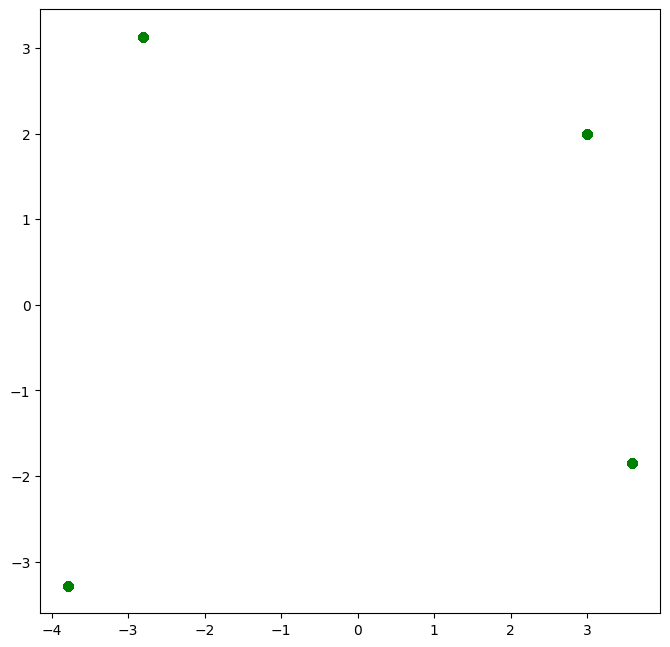

In [18]:
fig = plt.figure()
ax = plt.axes()

X,Y = zip(*current_position)


ax.scatter(X,Y,c = 'green')